In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 students. Each student:

- is given a fair coin by the instructor but they are not told that it is a fair coin
- collects data by flipping the coin **100 times** and counts the number of times it lands *Heads*
- runs a **hypothesis test**:
    - **Null Hypothesis**: They were givne a fair coin and the number of heads observed see is due to chance.
    - **Alternative Hypothesis**: The coin is biased and so the number of heads they observed is not due to chance alone.
    - **Test Statistic**: abs(num_heads - 50)
- runs 1000 simulations of flipping a fair coin 100 times (using Python)
- reports their p-value and rejects the null hypothesis if their p-value is less than 0.05

We know that we gave all of them fair coints. How often will they incorrectly reject the null hypothesis?

Could you write code to simulate the process of one student running this hypothesis test?

## Simulating the Simulation
In the following we will use simulation to simulate the students running a simulation. Very meta!

1. simulate one coin flip `np.random.choice()`
2. simulate 100 coin flips
3. calculate the observed test statistic
4. simulate one the statistic under the null hypothesis
5. simulate 1000x from null hypothesis
6. calculate p-value

In [27]:
# one coin flip
np.random.choice(['H','T'])

'H'

In [28]:
# one student flipping a coin 100x
# 100 coin flips
num_coin_flips = 100
obs_flips = np.random.choice(['H','T'], num_coin_flips)
# alternatively we could do np.,random.choice(['H','T'], 100)
len(obs_flips)
# obs_flips acts as our sample data or observed data
# this will be useful when we calculate the p-value later on
# p-value we need to compare our simulated test statstics with an observed test statistic (what actually happened in a given data set)
obs_flips

array(['T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H',
       'T', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'T', 'H',
       'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'H', 'H',
       'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T',
       'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'T', 'H',
       'T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'T',
       'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'T', 'T',
       'H', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'T'],
      dtype='<U1')

In [29]:
# 3. calculate the observed test statistic
# abs(num_heads - 50)
obs_test_statistic = abs(sum(obs_flips == "H") - 50)
# check obs_flips array and find all entries where it is equal to "H"
# obs_flips == "H" it gives us an array of boolean values, Trues or Falses
# when we take the sum of array of boolean values, it essentially counts the Trues
# converts Trues to 1s and Falses to 0s
# when we take the sum of an array of 1s and 0s, we are effectively counting the 1s (or Trues)


# the number below is my observed test statistic

In [38]:
#4. simulate one the statistic under the null hypothesis

# define a function to simulate coin flips and calculate statistic
def simulate_one_statistic():
    # each student flips a coin 100x
    num_coin_flips = 100
    # sim_flips simulates a 100 coin flips
    sim_flips = np.random.choice(['H','T'], num_coin_flips)
    # count the numberof times we got Heads or "H"
    # find its absolute distance from 50
    sim_test_statistic = abs(sum(sim_flips == "H") - 50)
    return sim_test_statistic

simulate_one_statistic()

3

In [47]:
#5. simulate 1000x from null hypothesis (for the sake of time we simulate 1_000 students flipping coins instead of 2_000)

num_simulations = 1_000
simulated_statistics = make_array() #initialize an empty array outside of our for loop
# to capture each simulate_one_statistic() and append it to this array
# by the end of the for loop, it should have 1_000 simulated statistics inside
# or len(simulated_statistics) == 1_000

for i in np.arange(num_simulations): # simulate 1000 students flipping coins
    one_statistic = simulate_one_statistic()
    simulated_statistics = np.append(simulated_statistics, one_statistic) # append to my array the value of one_statistic

#compute p-value
# what is the proportion of times we simulate the observed test statistic (obs_test_statistic) and further in the direction of the alternative

sum(simulated_statistics >= 6)/num_simulations
# obs_test_statistic = 6
# direction of the alternative is right of an empirical distribution, higher/greater values

# p-value = 0.258
# this means, 25.8% we were able to simulate the obs test statistic and further in the direction of the alternative

# we decided our p-value cut-off% was 5%
# our p-value > 5%, 
# therefore, we fail to reject the null
# we have no evidence that our coin isn't fair
# maybe this coin is fair after all


0.25800000000000001

In [65]:
def simulate_one_hypothesis_test():
    # Hypothesis Test: simulate under null hypothesis
    num_simulations = 1_000
    simulated_statistics = make_array() #initialize an empty array outside of our for loop

    for i in np.arange(num_simulations): # simulate 1000 students flipping coins
        one_statistic = simulate_one_statistic()
        simulated_statistics = np.append(simulated_statistics, one_statistic) # append to my array the value of one_statistic

    #compute p-value
    p_value = (sum(simulated_statistics >= obs_test_statistic)/num_simulations)
    return p_value
    
simulate_one_hypothesis_test()

0.25700000000000001

In [48]:
obs_test_statistic

6

### Simulate all students running the experiment

In [66]:
n_simulations = 1_000
all_simulations = make_array()

for i in np.arange(n_simulations):
    all_simulations = np.append(all_simulations, simulate_one_hypothesis_test())
    

## Plot the p-values

You would seldom do this in practice, but here we can visualize the distribution of p-values that all the students in the class get. Some will conclude that they have an unfair coin.



IndexError: index 0 is out of bounds for axis 0 with size 0

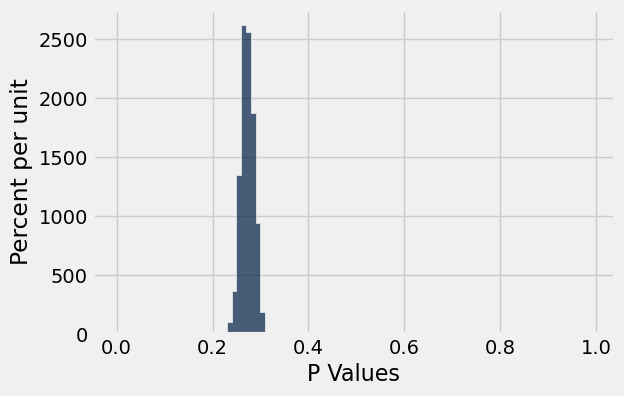

In [67]:
tbl = Table().with_column("P Values", all_simulations)
tbl.hist("P Values", bins=np.arange(0, 1, 0.01), right_end=0.05)

## Number of students who would reject the null

In [70]:
sum(all_simulations <= 0.05)

0

---

# Super Soda Co and the Case of Bad Taste
Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival. The boss is upset! He asks:

Do fewer people prefer Super Soda, or is this just chance?

You run a hypothesis test:

Null Hypothesis: Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
Alternative Hypothesis: Fewer people in the population prefer Super Soda than its Rival.
Test Statistic: Number of people who prefer Super Soda
You pick a p-value cutoff of 0.05

In [85]:
obs_statistic = 91 # number of people who preferred Super Soda out of 200

In [81]:
# simulate one taste test
# simulating under the null : equal chance of preferring Super Soda vs rival
def simulate_one_count(sample_size):
    simulated_data = np.random.choice(['Super', 'Rival'], sample_size)
    simulated_statistic = np.count_nonzero(simulated_data == "Super") 
    # or sum(simulated_data == "Super")
    # both count the number of Trues
    return simulated_statistic

simulate_one_count(200)



96

In [82]:
num_simulations = 10_000
counts = make_array()
for i in np.arange(num_simulations):
    counts = np.append(counts, simulate_one_count(200))

counts

array([  88.,  115.,  101., ...,  103.,   99.,  104.])

In [83]:
len(counts)

10000

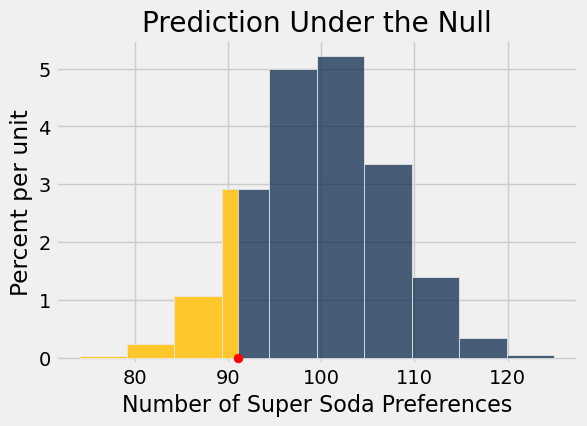

In [86]:
trials = Table().with_column('Number of Super Soda Preferences', counts)
trials.hist(right_end=91)
plots.ylim(-0.001, 0.055)
plots.scatter(obs_statistic, 0, color='red', s=40, zorder=3) #red dot:  observed test statistic = 91
plots.title('Prediction Under the Null');

In [93]:
p_value = np.count_nonzero(counts <= obs_statistic) / len(counts)
print('The p-value is', p_value)
print("or 11.33%, which is greater than the 5% cut-off. We fail to reject the null hypothesis. Equal proportion of the population prefer Super Soda vs Rival.People don't really have a preference between the two sodas.")

The p-value is 0.1133
or 11.33%, which is greater than the 5% cut-off. We fail to reject the null hypothesis. Equal proportion of the population prefer Super Soda vs Rival.People don't really have a preference between the two sodas.


## Changing the number of simulations
What happens if we run a different number of simulations?

### Simulating the Simulation (Again)
We can again run multiple simulations of our simulation.

In [ ]:
# For larger numbers of simulations, p-values are more consistent
tests.hist("p-value for 91", group='simulations', bins=20)

### Law of Large Number
The reason the p-values concentrate towards the true p-value is that the emprical distribution under the null is better approximates by increasing the number of simulations. More is better!

In [97]:
def simulate_null(num_simulations, sample_size):
    counts = make_array()
    for i in np.arange(num_simulations):
        counts = np.append(counts, simulate_one_count(sample_size))
    return counts
simulate_null(10_000, 200)

array([ 106.,   99.,  104., ...,  101.,   98.,   97.])

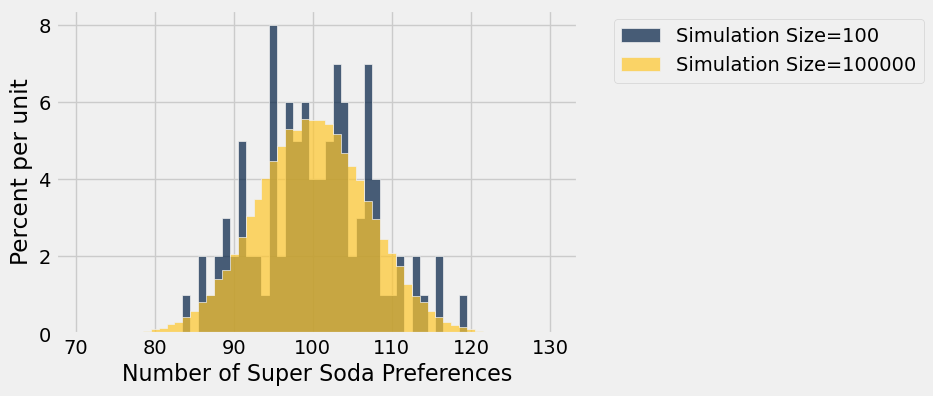

In [98]:
t1 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100, 200),
                           "Simulation Size", 100)

t2 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100_000, 200),
                           "Simulation Size", 100_000)

t1.append(t2).hist(group='Simulation Size', bins=np.arange(70.5, 131, 1))

## The Importance of Sample Size
Larger samples give us more information about the population and also allow us to test more subtle differences.

Suppose that the true proportion of people who prefer Super Soda is 45%

In [99]:
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

array([ 0.45,  0.55])

Taste tests with 200 people will give varioius numbers of people who prefer Super Soda

In [100]:
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

array([  94.,  106.])

In [101]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    p_value = run_test(num_simulations, sample_size, observed_stat_from_this_sample)
    return p_value

run_experiment(10000, 200, 0.45)

NameError: name 'run_test' is not defined

Try using different values for the true_proportion and sample size. What happens to as the true proportion gets closer to 0.5? What happens if we increase the sample size.

In [ ]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 100
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(1000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, right_end=0.05, bins=np.arange(0,1,0.1))
print("Percent that correctly reject the null", 100*np.mean(p_values <= 0.05))

# Example: Benford's Law

https://en.wikipedia.org/wiki/Benford%27s_law

In [ ]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)

In [ ]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [ ]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [ ]:
# County populations from the census data
counties = Table.read_table('data/counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

In [ ]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

In [ ]:
num_counties = counties.num_rows

In [ ]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

Null hypothesis:  the match up with  the bendfrd model is due to chance

Alternative hypothesis:  similarities in our counties' proportion and Benford's model are 

Test statistic: ___

Fill in the blank with "Bigger" or "Smaller":

___ values of the test statistic favor the alternative

In [ ]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd
print(proportions)
print(benford_model)

In [ ]:
sample_proportions(num_counties, benford_model)

In [ ]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

In [ ]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd

In [ ]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

In [ ]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)

In [ ]:
np.count_nonzero(simulated_tvds >= observed_tvd) / 10000

Are the data consistent with the null hypothesis?

## Example: sleep survey

In [ ]:
survey = Table.read_table('data/sleep_survey.csv')
survey

In [ ]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.with_column(
    'position',
    survey.apply(simplify, 'Sleep position')
).select('position', 'Hours of sleep')

survey

In [ ]:
survey.group('position', np.average)

Null hypothesis:  Any differences between average hours of sleep between back/stomach sleepersor side sleepers is due to chance

Alternative hypothesis:  

Back/stomach sleepers on average get more sleep than side sleepers


Test statistic:

__ Average hours of sleep for back/stomach - Average hours of sleep for side __
__ Asolute value of (Average hours of sleepfor back/stomach - Average hours of sleep for side) __



Fill in the blank with "Bigger" or "Smaller":

__ Larger __ values of the test statistic favor the alternative

In [ ]:
def compute_test_statistic(tbl):
    grouped = tbl.group('position', np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

In [ ]:
obs_test_stat = compute_test_statistic(survey)
obs_test_stat

In [ ]:
random_labels = survey.sample(with_replacement=False).column('position')

In [ ]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('position', random_labels)
    return compute_test_statistic(relabeled_tbl)


In [ ]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)

In [ ]:
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [ ]:
obs_test_stat

In [ ]:
np.mean(simulated_diffs <= obs_test_stat)

Are the data consistent with the null hypothesis?